<a href="https://colab.research.google.com/github/kkrusere/Developing-a-Score-to-Measure-Riskiness-of-Residential-Properties-Insurance/blob/main/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## <center> **Developing a Score to Measure Riskiness of Residential Properties Insurance** 

<center><em>Developing a Score to Measure Riskiness of Residential buildings, Homes, Apartments and Condos as part of an insurance policy underwriting. Insurance underwriting is how an insurance company evaluates its risk. In this project, we identify and explore multiple data sources to collect variables that could be used to develop a score that measures the riskiness of residential buildings to aid the insurance underwriting process.</em></center>


<center><img src="https://github.com/kkrusere/Developing-a-Score-to-Measure-Riskiness-of-Residential-Properties-Insurance/blob/main/assets/real-estate-risk.jpg?raw=1" width=600/></center>

***Project Contributors:*** Kuzi Rusere and Umair Shaikh<br>
**MVP streamlit App URL:** https://kkrusere-developing-a-score-to-measure-prototype-mvp-app-acxav4.streamlitapp.com

### **Modeling, Evaluation and Analysis of Clusters** 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Reading Data


In [ ]:
#we install the Python SQL Toolkit and Object Relational Mapper and the python MySQL connector
!pip install SQLAlchemy
!pip install mysql-connector-python
!pip install PyMySQL

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.5 MB 2.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.3 MB/s 


In [ ]:
# import mysql.connector as connection
# from sqlalchemy import create_engine
# import config #this holds our credentials for the database 

# host= config.host
# user= config.user
# db_password = config.password
# port = config.port
# database = config.database

# engine = create_engine(f"mysql+pymysql://{user}:{db_password}@{host}/{database}")

# try:
#     query = f"SELECT * FROM NYC_crime"
#     data = pd.read_sql(query,engine)

# except Exception as e:
#     print(str(e))

In [7]:
fdnyc_data = pd.read_csv("/content/drive/MyDrive/Capstone Project/Fire_Incident_Dispatch_Data100000.csv")

In [8]:
fdnyc_data.head()

INCIDENT_DATETIME INCIDENT_BOROUGH  ZIPCODE HIGHEST_ALARM_LEVEL  \
0  2014-03-15 06:39:53        MANHATTAN  10010.0         First Alarm   
1  2021-03-18 08:53:00         BROOKLYN  11232.0         First Alarm   
2  2020-07-15 19:26:00        MANHATTAN  10023.0         First Alarm   
3  2012-02-10 12:22:46        MANHATTAN  10023.0         First Alarm   
4  2014-06-18 18:05:02         BROOKLYN  11212.0         First Alarm   

                          INCIDENT_CLASSIFICATION  \
0              Multiple Dwelling 'A' - Other fire   
1  Multiple Dwelling 'A' - Food on the stove fire   
2  Multiple Dwelling 'A' - Food on the stove fire   
3              Multiple Dwelling 'A' - Other fire   
4                      Multiple Dwelling 'B' Fire   

  INCIDENT_CLASSIFICATION_GROUP  
0              Structural Fires  
1              Structural Fires  
2              Structural Fires  
3              Structural Fires  
4              Structural Fires

In [10]:
#we need to covert the zipcode from datatype float to string since it is a categorical data
fdnyc_data['ZIPCODE'] = fdnyc_data['ZIPCODE'].astype(int)
fdnyc_data['ZIPCODE'] = fdnyc_data['ZIPCODE'].astype(str)
fdnyc_data.head()

INCIDENT_DATETIME INCIDENT_BOROUGH ZIPCODE HIGHEST_ALARM_LEVEL  \
0  2014-03-15 06:39:53        MANHATTAN   10010         First Alarm   
1  2021-03-18 08:53:00         BROOKLYN   11232         First Alarm   
2  2020-07-15 19:26:00        MANHATTAN   10023         First Alarm   
3  2012-02-10 12:22:46        MANHATTAN   10023         First Alarm   
4  2014-06-18 18:05:02         BROOKLYN   11212         First Alarm   

                          INCIDENT_CLASSIFICATION  \
0              Multiple Dwelling 'A' - Other fire   
1  Multiple Dwelling 'A' - Food on the stove fire   
2  Multiple Dwelling 'A' - Food on the stove fire   
3              Multiple Dwelling 'A' - Other fire   
4                      Multiple Dwelling 'B' Fire   

  INCIDENT_CLASSIFICATION_GROUP  
0              Structural Fires  
1              Structural Fires  
2              Structural Fires  
3              Structural Fires  
4              Structural Fires

In [11]:
X = fdnyc_data.drop(columns=['INCIDENT_DATETIME','INCIDENT_CLASSIFICATION_GROUP'])

In [12]:
X.head()

INCIDENT_BOROUGH ZIPCODE HIGHEST_ALARM_LEVEL  \
0        MANHATTAN   10010         First Alarm   
1         BROOKLYN   11232         First Alarm   
2        MANHATTAN   10023         First Alarm   
3        MANHATTAN   10023         First Alarm   
4         BROOKLYN   11212         First Alarm   

                          INCIDENT_CLASSIFICATION  
0              Multiple Dwelling 'A' - Other fire  
1  Multiple Dwelling 'A' - Food on the stove fire  
2  Multiple Dwelling 'A' - Food on the stove fire  
3              Multiple Dwelling 'A' - Other fire  
4                      Multiple Dwelling 'B' Fire

In [13]:
!pip install kmodes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Modeling and Evaluation

In [ ]:
from kmodes.kmodes import KModes

Our modeling is divided into phases, this is the first part where we are going to be clustering our FDNYC fire incidence Data and NYPD Crime Data. The idea here is to cluster the data and analyze the cluster after. The goal of the analysis is to have a perspective of the attributes and features that caused or resulted in the data entries being clustered together.

For this, we are going to be using Kmode clustering. The most common unsupervised clustering algorithm is the Kmean clustering, it is a go-to machine learning algorithm when it comes to unlabeled data that needs to be grouped in some way that reviews patterns and insight within the data, provided that the data is numerical. Since our data is far from being numerical except for zip codes, latitudes, and longitudes, we cannot use Kmeans clustering. Hence, comes in Kmodes which is an extension of the Kmeans clustering algorithm that uses simple matching dissimilarity measures for categorical objects, where the means are replaced by modes of clusters.


<center><img src="https://github.com/kkrusere/Developing-a-Score-to-Measure-Riskiness-of-Residential-Properties-Insurance/blob/main/assets/kmodes.png?raw=1" width=600/></center>



Choosing the Appropriate Number of Clusters

We are going to look at the most commonly used method to evaluate the appropriate number of clusters:

* The elbow method


##### For FDNYC

In [ ]:
kmodes_param = {
    "init": "random",
    "n_init": 5,
    "max_iter": 10,
    "random_state": 42,
}
# A list holds the Cost values for each k
fdnyc_cost = []
for k in range(1, 11):
    fdnyc_kmode = KModes(n_clusters=k, **kmodes_param, verbose=1)
    fdnyc_kmode.fit_predict(X)
    fdnyc_cost.append(fdnyc_kmode.cost_)




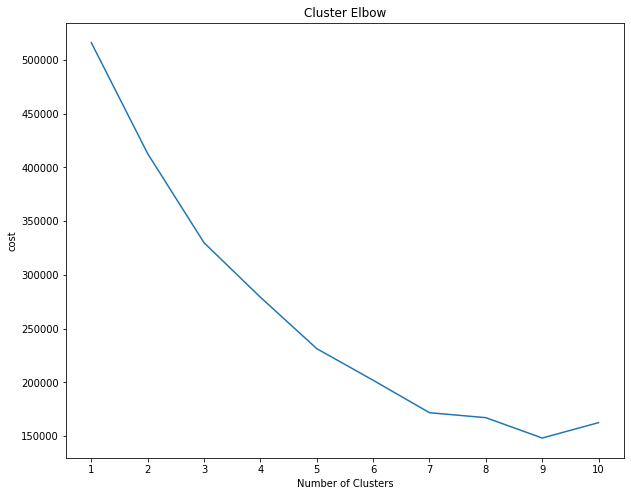

In [ ]:
#lest plot the elbow
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), fdnyc_cost)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("cost")
plt.title("Cluster Elbow")
plt.show()

In [ ]:
fdnyc_kmode.labels_

array([0, 1, 2, ..., 2, 5, 0], dtype=uint16)

In [ ]:
fdnyc_kmode = KModes(n_clusters=9, init = "random", n_init = 5, verbose=1)
fdnyc_clusters = fdnyc_kmode.fit_predict(X)
fdnyc_data.insert(0, "Cluster", fdnyc_clusters, True)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 29386, cost: 219336.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 72278, cost: 169259.0
Run 2, iteration: 2/100, moves: 28174, cost: 169259.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 116000, cost: 153386.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 65790, cost: 157924.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 20783, cost: 193580.0
Best run was number 3


In [ ]:
fdnyc_data.head()

Cluster    INCIDENT_DATETIME INCIDENT_BOROUGH  ZIPCODE HIGHEST_ALARM_LEVEL  \
0        1  2005-01-01 00:07:32           QUEENS  11368.0         First Alarm   
1        1  2005-01-01 00:14:40        MANHATTAN  10027.0         First Alarm   
2        2  2005-01-01 00:24:58         BROOKLYN  11238.0         First Alarm   
3        1  2005-01-01 00:27:19        MANHATTAN  10031.0       Seventh Alarm   
4        1  2005-01-01 00:27:19        MANHATTAN  10031.0   All Hands Working   

                  INCIDENT_CLASSIFICATION INCIDENT_CLASSIFICATION_GROUP  
0      Multiple Dwelling 'A' - Other fire              Structural Fires  
1  Multiple Dwelling 'A' - Compactor fire              Structural Fires  
2  Multiple Dwelling 'A' - Compactor fire              Structural Fires  
3      Multiple Dwelling 'A' - Other fire              Structural Fires  
4      Multiple Dwelling 'A' - Other fire              Structural Fires

In [ ]:
fdnyc_data.to_csv("/content/drive/MyDrive/Capstone Project/MODEL_Fire_Incident_Dispatch_Data.csv", index=False)

##### For NYPD

In [ ]:
#readin the NYPD Data
nypd_data = pd.read_csv("/content/drive/MyDrive/Capstone Project/NYPD_Complaint_Data_Historic.csv")
nypd_data.dropna(inplace=True)
nypd_data.head()

RPT_DT                       OFNS_DESC CRM_ATPT_CPTD_CD   LAW_CAT_CD  \
0  06/10/2018   OFF. AGNST PUB ORD SENSBLTY &        COMPLETED  MISDEMEANOR   
1  08/04/2018    ASSAULT 3 & RELATED OFFENSES        COMPLETED  MISDEMEANOR   
2  11/04/2018                  FELONY ASSAULT        COMPLETED       FELONY   
3  05/24/2018  CRIMINAL MISCHIEF & RELATED OF        COMPLETED  MISDEMEANOR   
4  11/18/2018                         ROBBERY        COMPLETED       FELONY   

     BORO_NM LOC_OF_OCCUR_DESC           PREM_TYP_DESC   Latitude  Longitude  
0  MANHATTAN            INSIDE  RESIDENCE - APT. HOUSE  40.759310 -73.994706  
1      BRONX            INSIDE  RESIDENCE - APT. HOUSE  40.826170 -73.916831  
2     QUEENS            INSIDE         RESIDENCE-HOUSE  40.707858 -73.759307  
3      BRONX            INSIDE         RESIDENCE-HOUSE  40.882615 -73.851948  
4      BRONX            INSIDE  RESIDENCE - APT. HOUSE  40.850357 -73.882989

In [ ]:
X = nypd_data.drop(["RPT_DT", "Latitude",	"Longitude"],  axis=1)

In [ ]:
#we model
kmodes_param = {
    "init": "random",
    "n_init": 5,
    "max_iter": 10,
    "random_state": 42,
}
# A list holds the cost values for each k
nypd_cost = []
for k in range(1, 11):
    nypd_kmode = KModes(n_clusters=k, **kmodes_param, verbose=1)
    nypd_kmode.fit_predict(X)
    nypd_cost.append(nypd_kmode.cost_)




In [ ]:
#lets plot the elbow
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), nypd_cost)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("cost")
plt.title("Cluster Elbow")
plt.show()

In [ ]:
nypd_kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
clusters = nypd_kmode.fit_predict(X)
nypd_data.insert(0, "Cluster", clusters, True)

In [ ]:
nypd_data.head()

In [ ]:
nypd_data.to_csv("/content/drive/MyDrive/Capstone Project/MODEL_NYPD_Complaint_Data_Historic.csv", index=False)

##### For the NYC Complaints and Service Requests 

In [ ]:
#readin the NYC Complaints and servise request Data = nyc_csr311_data
nyc_csr311_data = pd.read_csv("/content/drive/MyDrive/Capstone Project/NYC311Open_Data.csv")
nyc_csr311_data.dropna(inplace=True)
nyc_csr311_data.head()

In [ ]:
#we model
kmodes_param = {
    "init": "random",
    "n_init": 5,
    "max_iter": 10,
    "random_state": 42,
}
# A list holds the cost values for each k
nyc_csr311_cost = []
for k in range(1, 11):
    nyc_csr311_kmode = KModes(n_clusters=k, **kmodes_param, verbose=1)
    nyc_csr311_kmode.fit_predict(X)
    nyc_csr311_cost.append(nyc_csr311_kmode.cost_)


In [ ]:
#lets plot the elbow
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), nyc_csr311_cost)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("cost")
plt.title("Cluster Elbow")
plt.show()

In [ ]:
nyc_csr311_kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
nyc_csr311_clusters = nyc_csr311_kmode.fit_predict(X)
nyc_csr311_data.insert(0, "Cluster", nyc_csr311_clusters, True)

In [ ]:
nyc_csr311_data.to_csv("/content/drive/MyDrive/Capstone Project/MODEL_NYC311Open_Data.csv", index=False)

### Analysis of Clusters 

#### For FDNYC

In [ ]:
#let take a look at cluster 0
temp_df = data[data["Cluster"]==0]
temp_df.head()

Cluster   INCIDENT_DATETIME INCIDENT_BOROUGH  ZIPCODE HIGHEST_ALARM_LEVEL  \
0         0 2005-01-01 00:07:32           QUEENS  11368.0         First Alarm   
5         0 2005-01-01 00:46:26            BRONX  10470.0         First Alarm   
9         0 2005-01-01 02:06:09            BRONX  10457.0         First Alarm   
10        0 2005-01-01 02:09:59            BRONX  10463.0         First Alarm   
14        0 2005-01-01 02:25:30            BRONX  10467.0         First Alarm   

                           INCIDENT_CLASSIFICATION  \
0               Multiple Dwelling 'A' - Other fire   
5   Multiple Dwelling 'A' - Food on the stove fire   
9               Multiple Dwelling 'A' - Other fire   
10  Multiple Dwelling 'A' - Food on the stove fire   
14  Multiple Dwelling 'A' - Food on the stove fire   

   INCIDENT_CLASSIFICATION_GROUP  
0               Structural Fires  
5               Structural Fires  
9               Structural Fires  
10              Structural Fires  
14              Structural Fires

In [ ]:
#we can look at the distribution the baroughs in cluster 0
temp_df["INCIDENT_BOROUGH"].value_counts()

QUEENS                      73657
BRONX                       72856
RICHMOND / STATEN ISLAND     6513
BROOKLYN                        1
Name: INCIDENT_BOROUGH, dtype: int64

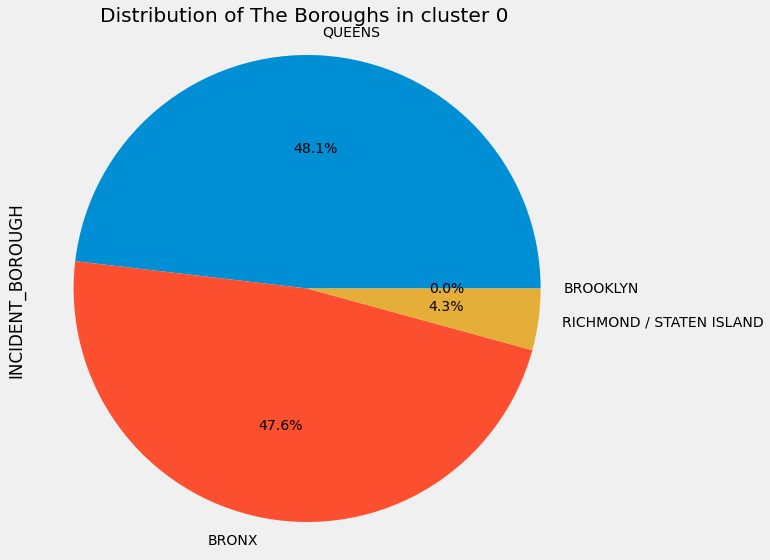

In [ ]:
temp_df['INCIDENT_BOROUGH'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,8))

plt.axis('equal')
plt.title('Distribution of The Boroughs in cluster 0')
plt.tight_layout()
plt.show()

In [ ]:
#still at cluster 0 lets look at the INCIDENT_CLASSIFICATION which is the types of fires that the FDNYC responded to
temp_df["INCIDENT_CLASSIFICATION"].value_counts()

Multiple Dwelling 'A' - Food on the stove fire    81931
Private Dwelling Fire                             33479
Multiple Dwelling 'A' - Other fire                27007
Multiple Dwelling 'B' Fire                         7281
Multiple Dwelling 'A' - Compactor fire             3329
Name: INCIDENT_CLASSIFICATION, dtype: int64

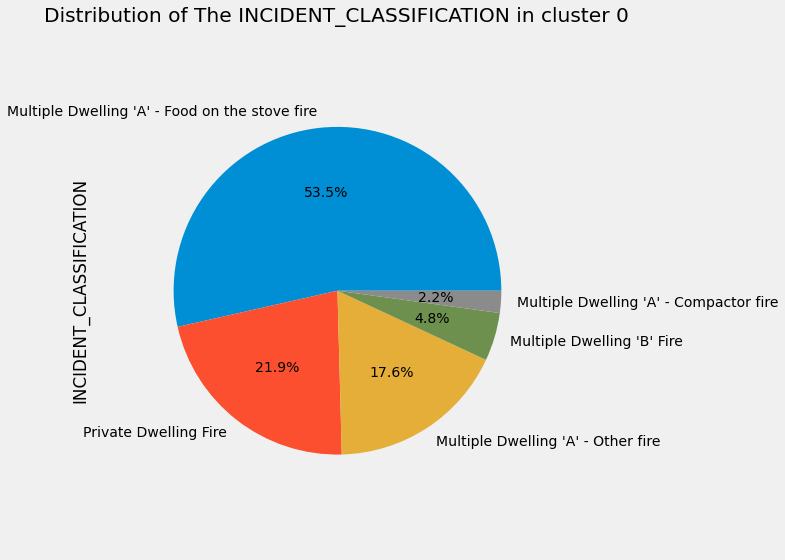

In [ ]:
temp_df['INCIDENT_CLASSIFICATION'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,8))

plt.axis('equal')
plt.title('Distribution of The INCIDENT_CLASSIFICATION in cluster 0')
plt.tight_layout()
plt.show()

Multiple Dwelling ‘A’ - Compactor Fire: this is a commercial compactor fire that is confined to the contents of a compactor. This excludes home trash compactors. This is in a multiple dwelling that is occupied by three or more families living independently of each other.

Multiple Dwelling ‘A’ - Food on the stove fire: this is a fire involving the contents of a cooking vessel that does not extend beyond the cooking vessel. This is in a multiple dwelling that is occupied by three or more families living independently of each other.

Private Dwelling Fire: a fire in a residence for not more than two families living independently of each other with separate cooking facilities.



In [ ]:
import plotly.express as px

fig = px.histogram(temp_df, x="INCIDENT_CLASSIFICATION", color="INCIDENT_BOROUGH", title="The distribution of types of fires per Borough in cluster 0")
fig.show()

In [ ]:

#let take a look at cluster 1
temp_df = data[data["Cluster"]==1]
temp_df.head()

Cluster   INCIDENT_DATETIME INCIDENT_BOROUGH  ZIPCODE HIGHEST_ALARM_LEVEL  \
2         1 2005-01-01 00:24:58         BROOKLYN  11238.0         First Alarm   
12        1 2005-01-01 02:13:52         BROOKLYN  11233.0         First Alarm   
16        1 2005-01-01 02:49:58            BRONX  10467.0         First Alarm   
19        1 2005-01-01 03:09:11         BROOKLYN  11223.0         First Alarm   
22        1 2005-01-01 03:22:41         BROOKLYN  11219.0         First Alarm   

                   INCIDENT_CLASSIFICATION INCIDENT_CLASSIFICATION_GROUP  
2   Multiple Dwelling 'A' - Compactor fire              Structural Fires  
12                   Private Dwelling Fire              Structural Fires  
16                   Private Dwelling Fire              Structural Fires  
19      Multiple Dwelling 'A' - Other fire              Structural Fires  
22                   Private Dwelling Fire              Structural Fires

In [ ]:
#we can look at the distribution the baroughs in cluster 0
temp_df["INCIDENT_BOROUGH"].value_counts()

BROOKLYN                    57205
RICHMOND / STATEN ISLAND    11958
BRONX                        9744
MANHATTAN                    1071
Name: INCIDENT_BOROUGH, dtype: int64

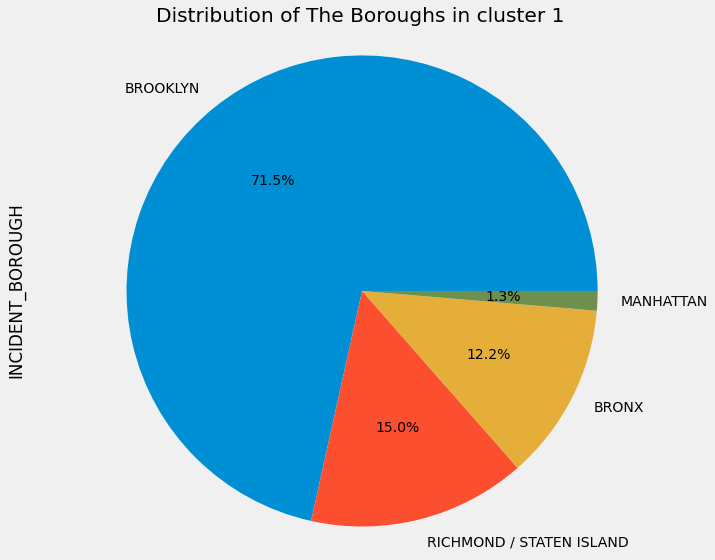

In [ ]:
temp_df['INCIDENT_BOROUGH'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,8))

plt.axis('equal')
plt.title('Distribution of The Boroughs in cluster 1')
plt.tight_layout()
plt.show()

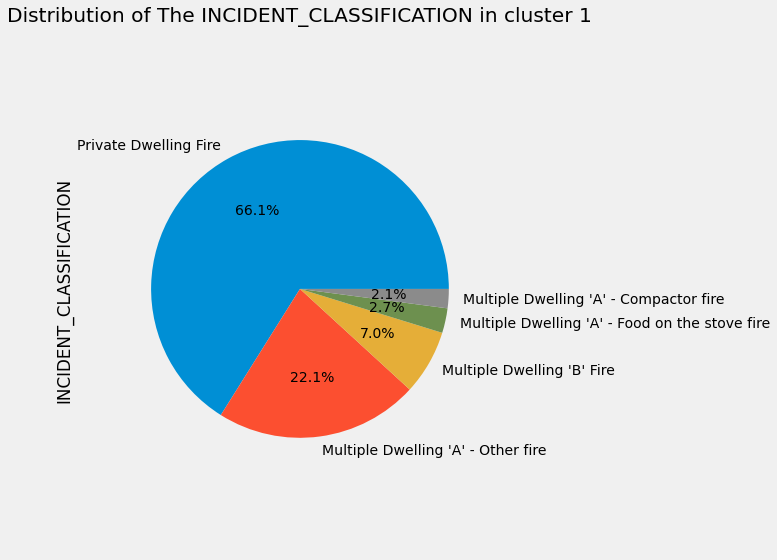

In [ ]:
temp_df['INCIDENT_CLASSIFICATION'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,8))

plt.axis('equal')
plt.title('Distribution of The INCIDENT_CLASSIFICATION in cluster 1')
plt.tight_layout()
plt.show()

In [ ]:
fig = px.histogram(temp_df, x="INCIDENT_CLASSIFICATION", color="INCIDENT_BOROUGH", title="The distribution of types of fires per Borough in cluster 1")
fig.show()

#### For NYPD

#### For NYC 311 Complaints and Service Requests

### **Commentary and Next steps**

Continuing with analyzing the clusters generated from the Kmodes clustering models for both the Fire Department and NYPD.
 
> For the FDNYC (Fire department) clusters, we need to create a ranking measure that we can use for ranking which borough is riskier to fires and which types of fires. We also have to have a better understanding of the types of fires using the fire department codes. 

> The NYPD, we are going to do the same thing, continued analysis to uncover the types of crimes in each of the clusters and the distribution of the borough in relation to the crime. We will use this to develop a ranking measure of the borough and crime. 

> This is very important as crime is one of the determinants of riskiness as far as homeowners insurance. The other determinants are the zipcode or location of the property and the average cost of residential properties in the location. With this in mind, the end goal is to join the 311 complaints and service request data, borough ranking measures, the FDNYC fire borough ranking measures, NYPD crime borough ranking measures, and the average cost of properties and average residential insurance cost per borough. 

This is still a work in progress 
> This joined dataset will be used to create a linear combination of fire, crime, complaints/service requests, cost of residential property, and the average insurance cost per borough as the target. 